In [39]:
import numpy as np
import tensorflow as tf
np.random.seed(1337)  # for reproducibility
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Input, Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.utils import np_utils
from keras.models import Model
import matplotlib.pyplot as plt
import matplotlib
import os
from keras.models import Sequential
import theano
from PIL import Image
from numpy import *
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [3]:
import glob
import PIL

pos_samples = []
lable = []
for filename in glob.glob("C:/Users/eli/Downloads/INRIAPerson0/INRIAPerson/Train/pos/*.png"):
    img = Image.open(filename)
    img = img.resize((112, 112), PIL.Image.ANTIALIAS)
    new_img = np.asarray(img)
    myimg_new = new_img.reshape(1, -1)
    pos_samples.append(myimg_new[0])
    lable.append(1)
    
pos_samples_final = np.array(pos_samples)
pos_labels = np.zeros((pos_samples_final.shape[0], 1))

neg_samples = []
for filename in glob.glob("C:/Users/eli/Downloads/INRIAPerson0/INRIAPerson/Train/neg/*.png"):
    img = Image.open(filename)
    img = img.resize((112, 112), PIL.Image.ANTIALIAS)
    new_img = np.asarray(img)
    myimg_new = new_img.reshape(1, -1)
    neg_samples.append(myimg_new[0])
    lable.append(0)

#lable = np.transpose(lable)
neg_samples_final = np.array(neg_samples)
neg_labels = np.zeros((neg_samples_final.shape[0], 1))
    
samples = np.vstack((pos_samples_final, neg_samples_final))
#labels = np.vstack((pos_labels, neg_labels))

In [4]:
X_train, Y_train, X_test, Y_test = train_test_split(samples, lable, test_size = 0.2)

In [4]:
print (len(samples), len(lable))

1526 1526


In [5]:
train_data = [samples,lable]

In [6]:
(X, y) = (train_data[0],train_data[1])

In [7]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [8]:
X_train, y_train = X,y

In [9]:
#X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
#X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)
#input_shape = (3, img_rows, img_cols)

In [10]:
import glob
import PIL

poss_samples = []
lable_test = []
for filename in glob.glob("C:/Users/eli/Downloads/INRIAPerson0/INRIAPerson/path/Test/pos/*.png"):
    img = Image.open(filename)
    img = img.resize((112, 112), PIL.Image.ANTIALIAS)
    new_img = np.asarray(img)
    myimg_new = new_img.reshape(1, -1)
    poss_samples.append(myimg_new[0])
    lable_test.append(1)

poss_samples_final = np.array(poss_samples)
poss_labels = np.zeros((poss_samples_final.shape[0], 1))

negg_samples = []
for filename in glob.glob("C:/Users/eli/Downloads/INRIAPerson0/INRIAPerson/path/Test/neg/*.png"):
    img = Image.open(filename)
    img = img.resize((112, 112), PIL.Image.ANTIALIAS)
    new_img = np.asarray(img)
    myimg_new = new_img.reshape(1, -1)
    negg_samples.append(myimg_new[0])
    lable_test.append(0)

#lable_test = np.transpose(lable_test)
negg_samples_final = np.array(negg_samples)
negg_labels = np.zeros((negg_samples_final.shape[0], 1))
    
sampless = np.vstack((poss_samples_final, negg_samples_final))
labelss = np.vstack((poss_labels, negg_labels))

In [11]:
print (len(sampless), len(lable_test))

588 588


In [12]:
type(lable_test)

list

In [13]:
test_data = [sampless,lable_test]

In [14]:
(w, z) = (test_data[0],test_data[1])

In [15]:
X_test, y_test= w,z


In [16]:
batch_size = 32
nb_classes = 1
nb_epoch = 100
nb_filters = 32
# size of pooling area for max pooling
pool_size = (2, 2)  ## 4 ELEMENTS, TOOK MAX OF IT
# convolution kernel size
#kernel_size = (3, 3)
# input image dimensions
img_rows, img_cols = 112,112

In [17]:
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)
input_shape = (3, img_rows, img_cols)

In [18]:
X_train =X_train.astype('float32' )
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (1526, 112, 112, 3)
1526 train samples
588 test samples


In [19]:
Y_train = np_utils.to_categorical(y_train, 2)
Y_test = np_utils.to_categorical(y_test, 2)

In [20]:

# build validation data# build  
split = 0.7
split_value = int(0.7 * len(X_train))

X_val = X_train[split_value:]
Y_val = Y_train[split_value:]

X_train = X_train[:split_value]
Y_train = Y_train[:split_value]

In [44]:


alexnet = Sequential()

# Layer 1
alexnet.add(Conv2D(48, (5, 5), input_shape=(112,112,3),padding='same'))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(3, 3)))

# Layer 2
alexnet.add(Conv2D(124, (3, 3), padding='same'))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(3, 3)))

# Layer 3
alexnet.add(Conv2D(192, (3, 3), padding='same'))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
#alexnet.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 4
alexnet.add(Conv2D(192, (3, 3), padding='same'))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))

# Layer 5
alexnet.add(Conv2D(124, (3, 3), padding='same'))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size = (3, 3)))
alexnet.add(Dropout(0.2))
alexnet.add(AveragePooling2D())


#LSTM Layer
alexnet.add(LSTM(16, input_shape = (None, 4096)))

'''
# Layer 6
alexnet.add(Flatten())
alexnet.add(Dense(6076,input_shape=(112*112*3,)))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(Dropout(0.5))

# Layer 7
alexnet.add(Dense(4096))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(Dropout(0.5))
'''
# Layer 8 output
alexnet.add(Dense(2))
alexnet.add(BatchNormalization())
alexnet.add(Activation('softmax'))
alexnet.summary()

ValueError: Input 0 is incompatible with layer lstm_11: expected ndim=3, found ndim=4

In [93]:
#model = Model(inputs=inp, outputs=layer5)                             ## DEFINE ACTUAL MODEL, INP. OUTPUT IS LAYER5
                                                                      ## THIS CONTAINS WHOLE CNN MODEL. NOW GO FOR OPTIMISER AND ALL

alexnet.compile(loss='binary_crossentropy',                    ## SGD IS LIKE EXTENSION OF BINARY CROSS ENTROPY
              optimizer='adam',                                        ## CATEGORICAL CAN BE CHANGED TO rmse OR SO...
              metrics=['accuracy'])

In [95]:
history = alexnet.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=1,
          verbose=1, validation_data=(X_val, Y_val))

C:\Users\eli\Anaconda3\lib\site-packages\keras\models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 1068 samples, validate on 458 samples
Epoch 1/1
1068/1068 [==============================] - 354s 332ms/step - loss: 0.1417 - acc: 0.9888 - val_loss: 0.7418 - val_acc: 0.5939


In [97]:
 
score= alexnet.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.47022453619509325
Test accuracy: 0.7925170068027211


In [33]:
model.save('model.h5')
print ("model saves")

model saves


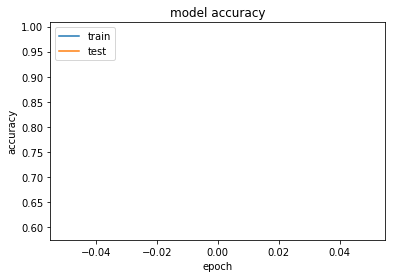

In [98]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [35]:
model.save_weights('my_model_weights.h5')

In [36]:
m=model.get_weights()
print (m)

[array([[[[-1.28613859e-01,  1.34354994e-01, -4.49305288e-02,
           7.19805211e-02,  7.26054460e-02,  4.57651094e-02,
          -8.72541741e-02, -2.00677868e-02, -2.11652108e-02,
           8.30819178e-03, -1.35883614e-01,  4.07402851e-02,
          -1.26279607e-01,  4.40199748e-02,  1.32826701e-01,
          -8.53918269e-02,  1.10220410e-01, -7.59202391e-02,
           1.24836244e-01,  1.19476892e-01, -6.21867329e-02,
           2.62809079e-02,  3.67659219e-02, -3.14559937e-02,
          -3.69437155e-04, -8.93901102e-03,  1.27405813e-02,
          -1.10135533e-01, -6.87141865e-02, -7.68987238e-02,
          -9.61968452e-02,  1.65332295e-02],
         [-1.26111150e-01,  3.24150287e-02,  5.18759601e-02,
          -1.34083942e-01, -1.27648994e-01, -3.07669044e-02,
          -4.96062227e-02, -7.62626752e-02, -1.14441022e-01,
           1.28132790e-01,  8.03921223e-02, -1.13106385e-01,
           4.96747382e-02,  1.48782693e-02,  1.83308441e-02,
           5.76419532e-02, -1.01868875e

In [37]:
p=model.set_weights(m)
print(p)

None


In [38]:
from keras.models import model_from_json

json_string = model.to_json()
model = model_from_json(json_string)